<a href="https://colab.research.google.com/github/uuuno/tf_doodle/blob/master/LeastSquareMethod_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf

In [3]:
tf.__version__

'2.2.0'

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow.keras as keras

In [6]:
train_t = np.array([
                    5.2,
                    5.7,
                    8.6,
                    14.9,
                    18.2,
                    20.4,
                    25.5,
                    26.4,
                    22.8,
                    17.5,
                    11.1,
                    6.6
])
train_t = train_t.reshape([12, 1])

In [9]:
train_x = np.array([ [mon**n for n in range(1, 5)] for mon in range(1, 13)])

In [10]:
train_x

array([[    1,     1,     1,     1],
       [    2,     4,     8,    16],
       [    3,     9,    27,    81],
       [    4,    16,    64,   256],
       [    5,    25,   125,   625],
       [    6,    36,   216,  1296],
       [    7,    49,   343,  2401],
       [    8,    64,   512,  4096],
       [    9,    81,   729,  6561],
       [   10,   100,  1000, 10000],
       [   11,   121,  1331, 14641],
       [   12,   144,  1728, 20736]])

In [14]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(1, input_shape=(4,), name="polynomial"))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
polynomial (Dense)           (None, 1)                 5         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(optimizer="adam", loss="mse")

In [17]:
history = model.fit(train_x, train_t, batch_size=12, epochs=100000, verbose=0)

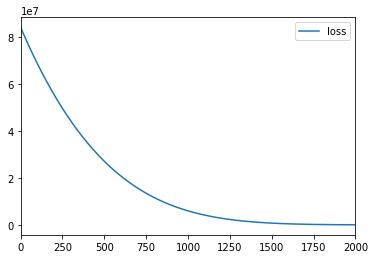

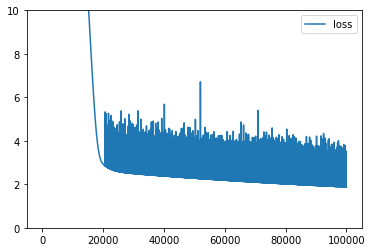

In [22]:
pd.DataFrame({"loss": history.history["loss"]}).plot(xlim=(0, 2000))
pd.DataFrame({"loss": history.history["loss"]}).plot(ylim=(0,10))

In [23]:
model.get_weights()

[array([[-1.1538311 ],
        [ 1.656178  ],
        [-0.18691039],
        [ 0.00483155]], dtype=float32), array([3.348618], dtype=float32)]

In [24]:
w, b = model.get_weights()
def predict(x):
  pred = b[0] + sum( [w[n][0]*x**(n+1) for n in range(0, 4)] )
  return pred

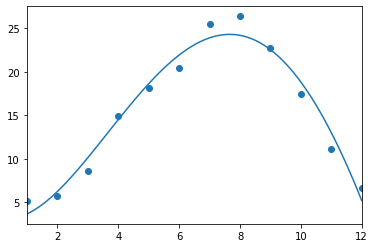

In [33]:
fig = plt.figure()
subplot = fig.add_subplot(1, 1, 1)
subplot.set_xlim(1, 12)
subplot.scatter(range(1, 13), train_t)
xs = np.linspace(1, 12, 100)
ys = predict(xs)
subplot.plot(xs, ys)